## Linear regression (1 feature)

<ipython-input-24-c028a905645a>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-24-c028a905645a>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', lut=N)


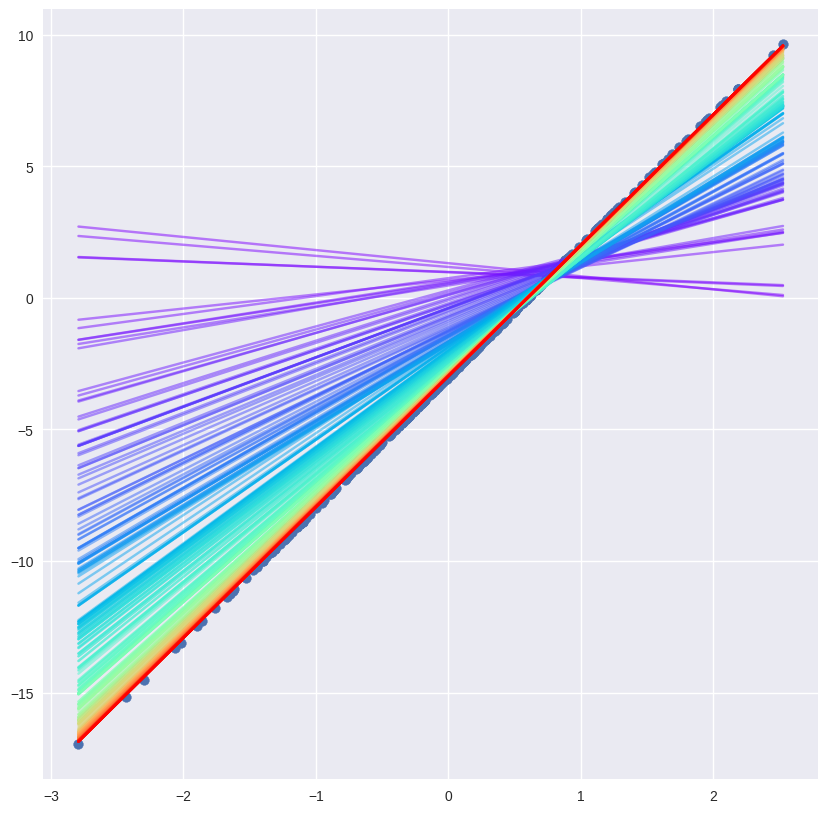

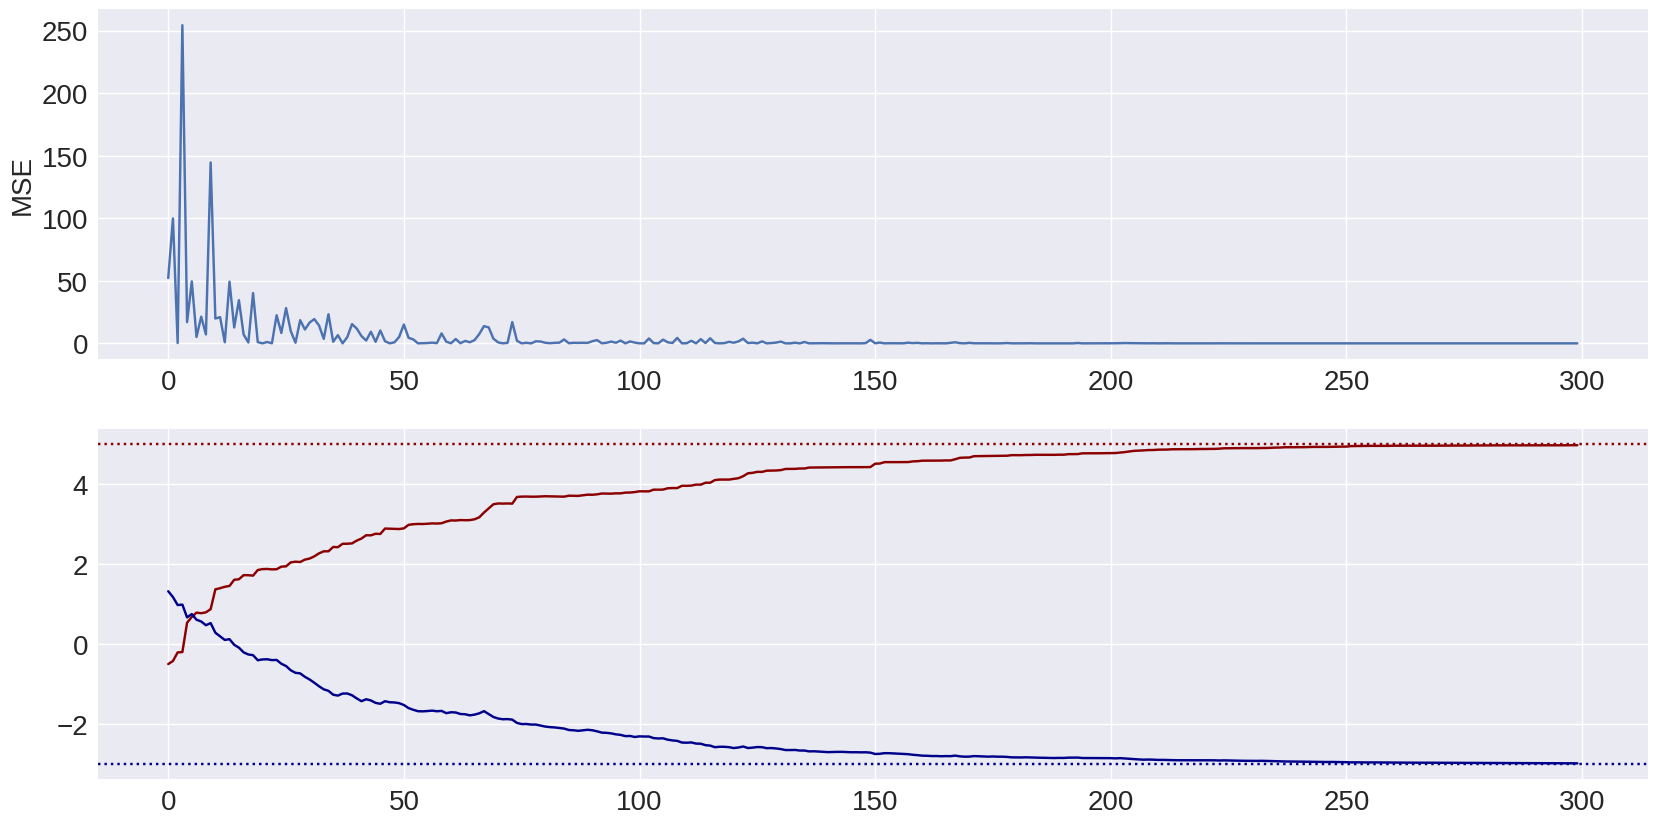

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)
plt.style.use('seaborn')

# set params
N = 300
lr = 0.01
t_w, t_b = 5, -3 # target weight and bias
w, b = np.random.uniform(-3,3,2) # inital weight and bias

# generate dataset
x_data = np.random.randn(N, )
y_data = x_data*t_w + t_b

# y_data += 0.3*np.random.randn(N,) # noise 섞어주기 

# visualize dataset
cmap = cm.get_cmap('rainbow', lut=N)
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(x_data, y_data)

x_range = np.array([x_data.min(), x_data.max()])
J_track = list()
w_track, b_track = list(), list()

# train model and visualize updated models
for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
    w_track.append(w)
    b_track.append(b)

    y_range = w*x_range + b
    ax.plot(x_range, y_range, color=cmap(data_idx), alpha=.5)


    # forward propagation
    pred = x*w + b
    J = (y - pred)**2
    J_track.append(J)

    # jacobians 
    dJ_dpred = -2*(y - pred)
    dpred_dw = x  # 내부 편미분
    dpred_db = 1  # 내부 편미분

    # backpropagation
    dJ_dw = dJ_dpred * dpred_dw
    dJ_db = dJ_dpred * dpred_db

    # paramter update
    # w = w - lr*dJ_dw
    w = w + 2*lr*x*(y - pred)
    # b = b - lr*dJ_db
    b = b + 2*lr*(y - pred)


# visualize results
fig, axes = plt.subplots(2,1,figsize=(20,10))
axes[0].plot(J_track)
axes[1].plot(w_track, color='darkred')
axes[1].plot(b_track, color='darkblue')

axes[0].set_ylabel('MSE', fontsize=20)
axes[0].tick_params(labelsize=20)

axes[1].axhline(y=t_w, color='darkred', linestyle=':') # target weight
axes[1].axhline(y=t_b, color='darkblue', linestyle=':') # target bias 
axes[1].tick_params(labelsize=20)




## ==> 전반적으로 학습 속도가 느려지는 것을 확인할 수 있음. 

# Linear Regression (n features)

<ipython-input-55-5ce337e950b3>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-55-5ce337e950b3>:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', lut=n_feature)


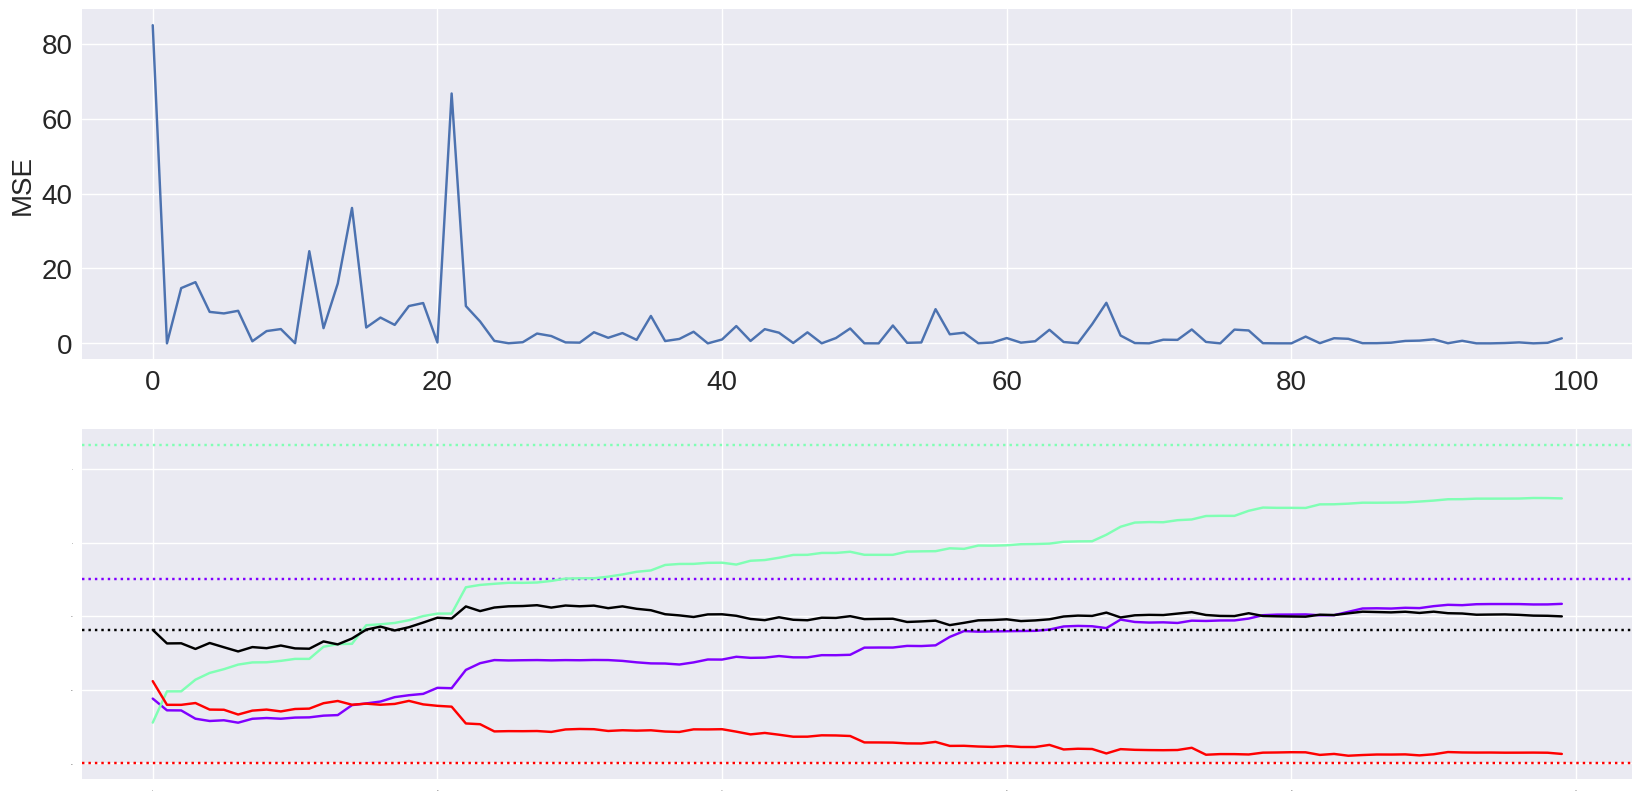

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)
plt.style.use('seaborn')


# set params
N, n_feature = 100, 3
lr = 0.01
t_W = np.random.uniform(-3,3,(n_feature, 1)) # 실제 weight는 컬럼 벡터로 만들어짐 (명시적으로 표시함)
t_b = np.random.uniform(-3,3,(1,))

W = np.random.uniform(-3,3,(n_feature, 1))
B = np.random.uniform(-3,3,(1,1)) # 형태 변환

# generate dataset
x_data = np.random.randn(N, n_feature)
y_data = x_data @ t_W + t_b


J_track = list()
W_track, b_track = list(), list()
for data_idx, (X,y) in enumerate(zip(x_data, y_data)):
    W_track.append(W)
    b_track.append(b)

    # forward propagation
    X = X.reshape(1,-1) # transpose해서 계산하기 때문에 reshape을 해줌. 
    pred = X @ W + b
    J = (y - pred)**2
    J_track.append(J.squeeze())

    # jacobians
    dJ_dpred = -2*(y - pred)
    dpred_dW = X
    dpred_db = 1

    # back propagation
    dJ_dW = dJ_dpred * dpred_dW
    dJ_db = dJ_dpred * dpred_db

    # parameter update
    W = W - lr*dJ_dW.T # transpose 
    b = b - lr*dJ_db

W_track = np.hstack(W_track)
b_track = np.concatenate(b_track)


# visualize results
fig, axes = plt.subplots(2,1,figsize=(20,10))
axes[0].plot(J_track)
axes[0].set_ylabel('MSE', fontsize=20)
axes[0].tick_params(labelsize=20)

cmap = cm.get_cmap('rainbow', lut=n_feature)
for w_idx, (t_w, w) in enumerate(zip(t_W, W_track)):
    axes[1].axhline(y=t_w, color=cmap(w_idx), linestyle=':')
    axes[1].plot(w, color=cmap(w_idx))
axes[1].axhline(y=t_b, color='black', linestyle=':')
axes[1].plot(b_track, color='black')
axes[1].tick_params(labelsize=0)